# KNN with iris dataset and K-Fold validation
The source code is a simple implementation for iris data set with the python programming language and KNN(K-NN) from scaratch. Also, 10-Fold validation is considered for finding hyperparameter of K. 

### Note
This code was written as my Machine Learning course's assignment in the fall of 2021, so it may have some bugs to fix or be coded more optimally.

### GitHub
https://github.com/MohsenEbadpour

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math


data = pd.read_csv("iris.data", header=None)
data = data.sample(frac=1).reset_index(drop=True) 
data

,0,1,2,3,4
0,6.3,3.3,6.0,2.5,Iris-virginica
1,6.1,3.0,4.6,1.4,Iris-versicolor
2,5.2,2.7,3.9,1.4,Iris-versicolor
3,6.1,2.6,5.6,1.4,Iris-virginica
4,6.3,2.7,4.9,1.8,Iris-virginica
...,...,...,...,...,...
145,6.4,3.2,4.5,1.5,Iris-versicolor
146,6.1,2.8,4.7,1.2,Iris-versicolor
147,5.9,3.0,4.2,1.5,Iris-versicolor
148,5.8,4.0,1.2,0.2,Iris-setosa


In [2]:
def SetLabel(x):
    if x == "Iris-setosa":
        return 0
    if x == "Iris-virginica":
        return 1
    if x == "Iris-versicolor":
        return 2

data[4] = data[4].apply(SetLabel)
data

,0,1,2,3,4
0,6.3,3.3,6.0,2.5,1
1,6.1,3.0,4.6,1.4,2
2,5.2,2.7,3.9,1.4,2
3,6.1,2.6,5.6,1.4,1
4,6.3,2.7,4.9,1.8,1
...,...,...,...,...,...
145,6.4,3.2,4.5,1.5,2
146,6.1,2.8,4.7,1.2,2
147,5.9,3.0,4.2,1.5,2
148,5.8,4.0,1.2,0.2,0


In [4]:
def Fold(ite,temp_data,n=10):
    ite -= 1
    count = int(temp_data.shape[0]/n)
    test = temp_data[ite*count:(ite+1)*(count)]
    train = temp_data.drop(range(ite*count,(ite+1)*(count)), axis=0)
    return test,train

def sort_key(item):
    return item[0]

def BestK(temp_data,n=10,_K_=1):
    
    CorrectList = []
    WrongList = []
    
    for k in range(1,n+1):
        test,train = Fold(k,temp_data,n) 
        correct = 0 
        wrong = 0        
        
        for _ , test_sample in test.iterrows(): 
            distance = [] 
            for __ , train_sample in train.iterrows():
                dis = math.sqrt((train_sample[0]-test_sample[0])**2 + (train_sample[1]-test_sample[1])**2+(train_sample[2]-test_sample[2])**2+(train_sample[3]-test_sample[3])**2)
                distance.append([dis,train_sample[4]])
            
            distance.sort(key=sort_key)
            
            neighboors = distance[0:_K_]
            
            labels = {0:0,1:0,2:0}
            for i in neighboors:
                labels[i[1]] +=1 
                 
            predicted = sorted(labels.items(), key=lambda x: x[1], reverse=True)[0]
            
            
            if predicted[0] == test_sample[4] :
                correct += 1
            else :
                wrong += 1
        
        CorrectList.append(correct)
        WrongList.append(wrong)
        
    
    return sum(CorrectList)/len(CorrectList),sum(WrongList)/len(WrongList)
                


Corrects = []
Wrongs = []
for index in range(1,51):        
    c,w = BestK(data,10,index)
    Corrects.append(c)
    Wrongs.append(w)
    print("Calculated K={0}".format(index))



Calculated K=1
Calculated K=2
Calculated K=3
Calculated K=4
Calculated K=5
Calculated K=6
Calculated K=7
Calculated K=8
Calculated K=9
Calculated K=10
Calculated K=11
Calculated K=12
Calculated K=13
Calculated K=14
Calculated K=15
Calculated K=16
Calculated K=17
Calculated K=18
Calculated K=19
Calculated K=20
Calculated K=21
Calculated K=22
Calculated K=23
Calculated K=24
Calculated K=25
Calculated K=26
Calculated K=27
Calculated K=28
Calculated K=29
Calculated K=30
Calculated K=31
Calculated K=32
Calculated K=33
Calculated K=34
Calculated K=35
Calculated K=36
Calculated K=37
Calculated K=38
Calculated K=39
Calculated K=40
Calculated K=41
Calculated K=42
Calculated K=43
Calculated K=44
Calculated K=45
Calculated K=46
Calculated K=47
Calculated K=48
Calculated K=49
Calculated K=50


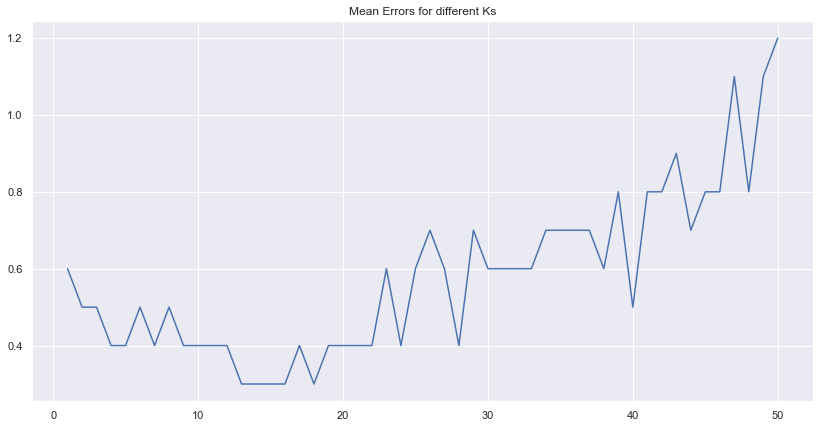

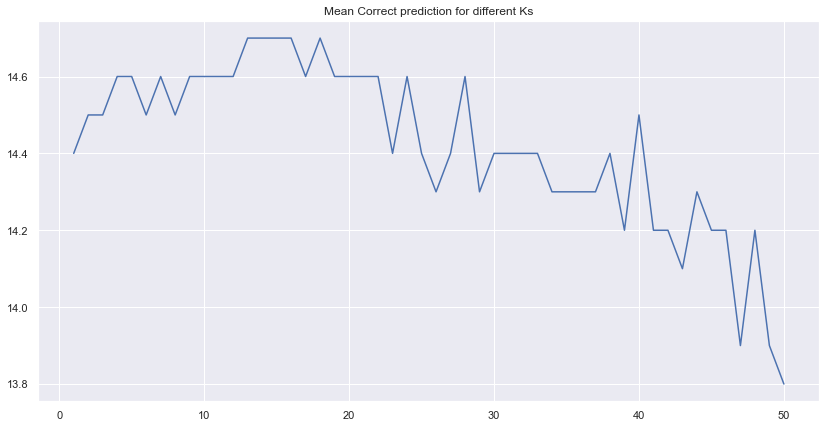

Best K based on mean corrects:  13


In [7]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.lineplot(x=list(range(1,51)), y=Wrongs).set_title('Mean Errors for different Ks')
plt.show()
sns.lineplot(x=list(range(1,51)), y=Corrects).set_title('Mean Correct prediction for different Ks')
plt.show()

print("Best K based on mean corrects: ",Corrects.index(max(Corrects))+1)

Text(0.5, 1.0, 'Confusion Matrix, K=13, accuracy=96.67%')

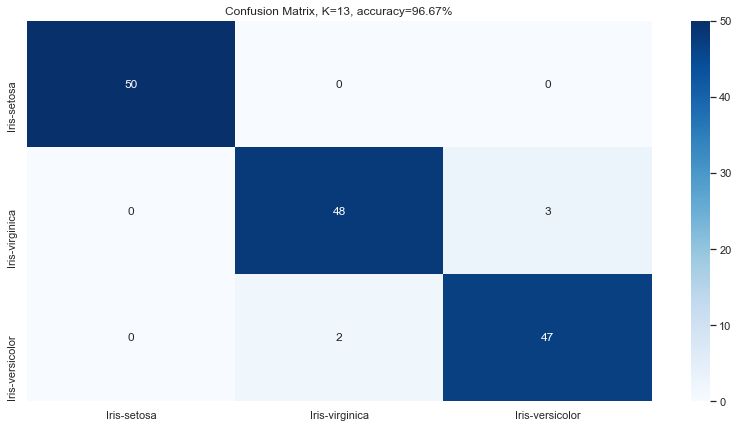

In [8]:
def ConfMatrix(temp_data,_K_=1):
    confusion_matrix = []
    for _ in range(3):
        confusion_matrix.append([0,0,0])
        
    for _ , test_sample in temp_data.iterrows():
        distance = []
        for __ , train_sample in temp_data.iterrows():
            if test_sample[0]  == train_sample[0] and  test_sample[1]  == train_sample[1] and test_sample[2]  == train_sample[2] and test_sample[3]  == train_sample[3] and test_sample[4]  == train_sample[4] :
                continue
            dis = math.sqrt((train_sample[0]-test_sample[0])**2 + (train_sample[1]-test_sample[1])**2+(train_sample[2]-test_sample[2])**2+(train_sample[3]-test_sample[3])**2)
            distance.append([dis,train_sample[4]])
        distance.sort(key=sort_key)
        neighboors = distance[0:_K_]
        labels = {0:0,1:0,2:0}
        for i in neighboors:
            labels[i[1]] +=1 
            
        predicted = sorted(labels.items(), key=lambda x: x[1], reverse=True)[0]
        p = predicted[0]
        y = int(test_sample[4])
        confusion_matrix[p][y] += 1

        
    return confusion_matrix

plt.rcParams["figure.figsize"] = (14,7)
k = Corrects.index(max(Corrects))+1
cm = ConfMatrix(data,k)
acc = ((cm[0][0]+cm[1][1]+cm[2][2])/150)*100
acc = round(acc,2)
l =["Iris-setosa","Iris-virginica","Iris-versicolor"]
sns.heatmap(cm ,annot=True, xticklabels =l,yticklabels =l, cmap='Blues').set_title("Confusion Matrix, K={0}, accuracy={1}%".format(k,acc))